## Feature Engineering - Delhivery

Objective of this notebook is:

1. To understand the patterns in the data.
2. How to Handle the categorical features.
3. How to deal with missing data.
4. Feature Engineering
5. Finding the most important features
6. Understanding the Normalization and standardisation of the data.


## Load data and libraries

In [481]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [482]:
delhivery_df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv")


In [483]:
delhivery_df.shape

(144867, 24)

In [484]:
delhivery_df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [485]:
delhivery_df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [486]:
delhivery_df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [487]:
delhivery_df.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
dtype: int64

## Basic Data Exploration

In [488]:
df_trip = delhivery_df [delhivery_df['trip_uuid'] == 'trip-153741093647649320']
df_trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


In [489]:
delhivery_df.describe().T
# only numeric features

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,144867.0,961.262986,1037.012769,20.000000,161.000000,449.000000,1634.000000,7898.000000
cutoff_factor,144867.0,232.926567,344.755577,9.000000,22.000000,66.000000,286.000000,1927.000000
actual_distance_to_destination,144867.0,234.073372,344.990009,9.000045,23.355874,66.126571,286.708875,1927.447705
actual_time,144867.0,416.927527,598.103621,9.000000,51.000000,132.000000,513.000000,4532.000000
osrm_time,144867.0,213.868272,308.011085,6.000000,27.000000,64.000000,257.000000,1686.000000
osrm_distance,144867.0,284.771297,421.119294,9.008200,29.914700,78.525800,343.193250,2326.199100
factor,144867.0,2.120107,1.715421,0.144000,1.604264,1.857143,2.213483,77.387097
segment_actual_time,144867.0,36.196111,53.571158,-244.000000,20.000000,29.000000,40.000000,3051.000000
segment_osrm_time,144867.0,18.507548,14.775960,0.000000,11.000000,17.000000,22.000000,1611.000000
segment_osrm_distance,144867.0,22.829020,17.860660,0.000000,12.070100,23.513000,27.813250,2191.403700


In [490]:
# catgeorical features
delhivery_df.describe(include = ['object']).T

,count,unique,top,freq
data,144867,2,training,104858
trip_creation_time,144867,14817,2018-09-28 05:23:15.359220,101
route_schedule_uuid,144867,1504,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812
route_type,144867,2,FTL,99660
trip_uuid,144867,14817,trip-153811219535896559,101
source_center,144867,1508,IND000000ACB,23347
source_name,144574,1498,Gurgaon_Bilaspur_HB (Haryana),23347
destination_center,144867,1481,IND000000ACB,15192
destination_name,144606,1468,Gurgaon_Bilaspur_HB (Haryana),15192
od_start_time,144867,26369,2018-09-21 18:37:09.322207,81


In [491]:
#missing values
delhivery_df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [492]:
# catgeorical and numerical columns
cat_cols = delhivery_df.dtypes =='object'
cat_cols = list(cat_cols[cat_cols].index)

num_cols = delhivery_df.dtypes !='object'
num_cols = list(num_cols[num_cols].index)

In [493]:
cat_cols

['data',
 'trip_creation_time',
 'route_schedule_uuid',
 'route_type',
 'trip_uuid',
 'source_center',
 'source_name',
 'destination_center',
 'destination_name',
 'od_start_time',
 'od_end_time',
 'cutoff_timestamp']

In [494]:
num_cols

['start_scan_to_end_scan',
 'is_cutoff',
 'cutoff_factor',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'factor',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'segment_factor']

In [495]:
delhivery_df[cat_cols].head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 04:27:55
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 04:17:55
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 04:01:19.505586
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 03:39:57
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 03:33:55


In [496]:
delhivery_df[num_cols].head()

,start_scan_to_end_scan,is_cutoff,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,86.0,True,9,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,86.0,True,18,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,86.0,True,27,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,86.0,True,36,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,86.0,False,39,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [497]:
delhivery_df.route_type.value_counts()

FTL        99660
Carting    45207
Name: route_type, dtype: int64

## Handle Missing value

Source name and destination name missing in some rows, replacing with 'others', don't want to loss any info from available data

In [498]:
delhivery_df['source_name'] = delhivery_df['source_name'].fillna('Others')
delhivery_df['destination_name'] = delhivery_df['destination_name'].fillna('Others')
delhivery_df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


In [499]:
#missing values
delhivery_df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

## Basic Data Engineering

In [398]:
def getState(value):
    try:
        float(value)        
        return value
    except ValueError:
        return value[value.find('(')+1: -1]

#### Createing city, place, code & state from source and destination name

In [399]:
# Feature Creation from existing feature(spliting city, locality, category and state from source name)

delhivery_df['source_city'] = delhivery_df['source_name'].str.split('_').str[0]
delhivery_df['source_place'] = delhivery_df['source_name'].str.split('_').str[1]
delhivery_df['source_code'] = delhivery_df['source_name'].str.split('_').str[2].str.split(" ").str[0]
delhivery_df['source_state'] = delhivery_df['source_name'].apply(lambda x: getState(x))
delhivery_df.drop('source_name', axis=1, inplace=True)
delhivery_df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,destination_center,destination_name,od_start_time,od_end_time,...,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,source_state
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Anand,VUNagar,DC,Gujarat
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Anand,VUNagar,DC,Gujarat
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,32.5395,1.428571,16.0,7.0,10.8152,2.285714,Anand,VUNagar,DC,Gujarat
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,45.5620,1.550000,21.0,12.0,13.0224,1.750000,Anand,VUNagar,DC,Gujarat
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,54.2181,1.545455,6.0,5.0,3.9153,1.200000,Anand,VUNagar,DC,Gujarat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,...,67.9280,1.566667,12.0,12.0,8.1858,1.000000,Sonipat,Kundli,H,Haryana
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,...,85.6829,1.578947,26.0,21.0,17.3725,1.238095,Sonipat,Kundli,H,Haryana
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,...,97.0933,1.590909,20.0,34.0,20.7053,0.588235,Sonipat,Kundli,H,Haryana
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,...,111.2709,1.612245,17.0,27.0,18.8885,0.629630,Sonipat,Kundli,H,Haryana


In [400]:
# Feature Creation from existing feature(spliting city, locality, category and state from destination name)

delhivery_df['destination_city'] = delhivery_df['destination_name'].str.split('_').str[0]
delhivery_df['destination_place'] = delhivery_df['destination_name'].str.split('_').str[1]
delhivery_df['destination_code'] = delhivery_df['destination_name'].str.split('_').str[2].str.split(" ").str[0]
delhivery_df['destination_state'] = delhivery_df['destination_name'].apply(lambda x: getState(x))
delhivery_df.drop('destination_name', axis=1, inplace=True)
delhivery_df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,...,segment_osrm_distance,segment_factor,source_city,source_place,source_code,source_state,destination_city,destination_place,destination_code,destination_state
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,11.9653,1.272727,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,9.7590,1.111111,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,10.8152,2.285714,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,13.0224,1.750000,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,3.9153,1.200000,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,Gujarat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,IND000000ACB,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,...,8.1858,1.000000,Sonipat,Kundli,H,Haryana,Gurgaon,Bilaspur,HB,Haryana
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,IND000000ACB,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,...,17.3725,1.238095,Sonipat,Kundli,H,Haryana,Gurgaon,Bilaspur,HB,Haryana
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,IND000000ACB,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,...,20.7053,0.588235,Sonipat,Kundli,H,Haryana,Gurgaon,Bilaspur,HB,Haryana
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,IND000000ACB,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,...,18.8885,0.629630,Sonipat,Kundli,H,Haryana,Gurgaon,Bilaspur,HB,Haryana


#### Trip creating day, month & year from trip_creation_time

In [407]:
temp= pd.to_datetime(delhivery_df['trip_creation_time'], format='%Y-%m-%d %H:%M:%S')
delhivery_df['trip_creation_date'] = temp.dt.strftime('%d')
delhivery_df['trip_creation_month'] = temp.dt.strftime('%M')
delhivery_df['trip_creation_year'] = temp.dt.strftime('%Y')
delhivery_df['trip_creation_hour'] = temp.dt.strftime('%H')
delhivery_df['trip_creation_minute'] = temp.dt.strftime('%M')
delhivery_df['trip_creation_second'] = temp.dt.strftime('%S')
delhivery_df.drop('trip_creation_time', axis=1, inplace=True)
delhivery_df
# temp
# df['Time'] = df['DateTime'].dt.strftime('%H:%M')


,data,route_schedule_uuid,route_type,trip_uuid,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,...,destination_city,destination_place,destination_code,destination_state,trip_creation_date,trip_creation_month,trip_creation_year,trip_creation_hour,trip_creation_minute,trip_creation_second
0,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,...,Khambhat,MotvdDPP,D,Gujarat,20,35,2018,02,35,36
1,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,...,Khambhat,MotvdDPP,D,Gujarat,20,35,2018,02,35,36
2,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,...,Khambhat,MotvdDPP,D,Gujarat,20,35,2018,02,35,36
3,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,...,Khambhat,MotvdDPP,D,Gujarat,20,35,2018,02,35,36
4,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,...,Khambhat,MotvdDPP,D,Gujarat,20,35,2018,02,35,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,IND000000ACB,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,...,Gurgaon,Bilaspur,HB,Haryana,20,24,2018,16,24,28
144863,training,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,IND000000ACB,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,...,Gurgaon,Bilaspur,HB,Haryana,20,24,2018,16,24,28
144864,training,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,IND000000ACB,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,...,Gurgaon,Bilaspur,HB,Haryana,20,24,2018,16,24,28
144865,training,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,IND000000ACB,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,...,Gurgaon,Bilaspur,HB,Haryana,20,24,2018,16,24,28


#### Overall time taken (od_end_time - od_start_time)

In [421]:
od_start_time = pd.to_datetime(delhivery_df['od_start_time'], format='%Y-%m-%d %H:%M:%S')
od_end_time = pd.to_datetime(delhivery_df['od_end_time'], format='%Y-%m-%d %H:%M:%S')
diff = od_end_time - od_start_time
delhivery_df['time_difference'] = diff.dt.total_seconds() / 60
delhivery_df.drop('od_start_time', axis=1, inplace=True)
delhivery_df.drop('od_end_time', axis=1, inplace=True)
delhivery_df

,data,route_schedule_uuid,route_type,trip_uuid,source_center,destination_center,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,...,destination_place,destination_code,destination_state,trip_creation_date,trip_creation_month,trip_creation_year,trip_creation_hour,trip_creation_minute,trip_creation_second,time_difference
0,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,True,9,2018-09-20 04:27:55,...,MotvdDPP,D,Gujarat,20,35,2018,02,35,36,86.213637
1,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,True,18,2018-09-20 04:17:55,...,MotvdDPP,D,Gujarat,20,35,2018,02,35,36,86.213637
2,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,True,27,2018-09-20 04:01:19.505586,...,MotvdDPP,D,Gujarat,20,35,2018,02,35,36,86.213637
3,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,True,36,2018-09-20 03:39:57,...,MotvdDPP,D,Gujarat,20,35,2018,02,35,36,86.213637
4,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,False,39,2018-09-20 03:33:55,...,MotvdDPP,D,Gujarat,20,35,2018,02,35,36,86.213637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,IND000000ACB,427.0,True,45,2018-09-20 21:57:20,...,Bilaspur,HB,Haryana,20,24,2018,16,24,28,427.686364
144863,training,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,IND000000ACB,427.0,True,54,2018-09-20 21:31:18,...,Bilaspur,HB,Haryana,20,24,2018,16,24,28,427.686364
144864,training,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,IND000000ACB,427.0,True,63,2018-09-20 21:11:18,...,Bilaspur,HB,Haryana,20,24,2018,16,24,28,427.686364
144865,training,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,IND000000ACB,427.0,True,72,2018-09-20 20:53:19,...,Bilaspur,HB,Haryana,20,24,2018,16,24,28,427.686364


## GroupBy based on trip id, source center & destination center

In [477]:
df = pd.DataFrame(delhivery_df.groupby(['trip_uuid', 'source_center', 'destination_center']).agg({'route_type' : 'last',
                                                                                                  'source_city' : 'last',                                                                                                  
                                                                                                  'source_place' : 'last',
                                                                                                  'source_code' : 'last',
                                                                                                  'source_state' : 'last',
                                                                                                  'destination_city': 'last',
                                                                                                  'destination_place': 'last',
                                                                                                  'destination_code': 'last',
                                                                                                  'destination_state': 'last',                                                                                                  
                                                                                                  'start_scan_to_end_scan': 'last',
                                                                                                  'time_difference':'last',
                                                                                                  'actual_time':'max',                                                                                                  
                                                                                                  'osrm_time':'max',
                                                                                                  'segment_osrm_time': 'sum',
                                                                                                  'segment_actual_time':'sum',
                                                                                                  'osrm_distance': 'max',                                                                                                  
                                                                                                  'segment_osrm_distance':'sum',
                                                                                                  'actual_distance_to_destination' : 'max'})).reset_index()
df

,trip_uuid,source_center,destination_center,route_type,source_city,source_place,source_code,source_state,destination_city,destination_place,...,destination_state,start_scan_to_end_scan,time_difference,actual_time,osrm_time,segment_osrm_time,segment_actual_time,osrm_distance,segment_osrm_distance,actual_distance_to_destination
0,trip-153671041653548748,IND209304AAA,IND000000ACB,FTL,Kanpur,Central,H,Uttar Pradesh,Gurgaon,Bilaspur,...,Haryana,1260.0,1260.604421,732.0,349.0,534.0,728.0,446.5496,670.6205,383.759164
1,trip-153671041653548748,IND462022AAA,IND209304AAA,FTL,Bhopal,Trnsport,H,Madhya Pradesh,Kanpur,Central,...,Uttar Pradesh,999.0,999.505379,830.0,394.0,474.0,820.0,544.8027,649.8528,440.973689
2,trip-153671042288605164,IND561203AAB,IND562101AAA,Carting,Doddablpur,ChikaDPP,D,Karnataka,Chikblapur,ShntiSgr,...,Karnataka,58.0,58.832388,47.0,26.0,26.0,46.0,28.1994,28.1995,24.644021
3,trip-153671042288605164,IND572101AAA,IND561203AAB,Carting,Tumkur,Veersagr,I,Karnataka,Doddablpur,ChikaDPP,...,Karnataka,122.0,122.779486,96.0,42.0,39.0,95.0,56.9116,55.9899,48.542890
4,trip-153671043369099517,IND000000ACB,IND160002AAC,FTL,Gurgaon,Bilaspur,HB,Haryana,Chandigarh,Mehmdpur,...,Punjab,834.0,834.638929,611.0,212.0,231.0,608.0,281.2109,317.7408,242.309306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069,IND628204AAA,IND627657AAA,Carting,Tirchchndr,Shnmgprm,D,Tamil Nadu,Thisayanvilai,UdnkdiRD,...,Tamil Nadu,62.0,62.115193,51.0,41.0,42.0,49.0,42.5213,42.1431,33.627182
26364,trip-153861115439069069,IND628613AAA,IND627005AAA,Carting,Peikulam,SriVnktpm,D,Tamil Nadu,Tirunelveli,VdkkuSrt,...,Tamil Nadu,91.0,91.087797,90.0,48.0,77.0,89.0,40.6080,78.5869,33.673835
26365,trip-153861115439069069,IND628801AAA,IND628204AAA,Carting,Eral,Busstand,D,Tamil Nadu,Tirchchndr,Shnmgprm,...,Tamil Nadu,44.0,44.174403,30.0,14.0,14.0,29.0,16.0185,16.0184,12.661945
26366,trip-153861118270144424,IND583119AAA,IND583101AAA,FTL,Sandur,WrdN1DPP,D,Karnataka,Bellary,Dc (Karnataka),...,Karnataka,287.0,287.474007,233.0,42.0,42.0,233.0,52.5303,52.5303,40.546740


## Categorical to Numerical encoding

1. Label encoding

In [478]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
cols=['trip_uuid', 'source_center', 'destination_center', 'route_type', 'source_city', 'source_place', 'source_code', 'source_state', 'destination_city',  'destination_place', 'destination_code', 'destination_state']
for col in cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))
df

,trip_uuid,source_center,destination_center,route_type,source_city,source_place,source_code,source_state,destination_city,destination_place,...,destination_state,start_scan_to_end_scan,time_difference,actual_time,osrm_time,segment_osrm_time,segment_actual_time,osrm_distance,segment_osrm_distance,actual_distance_to_destination
0,0,206,6,1,565,172,7,29,418,123,...,11,1260.0,1260.604421,732.0,349.0,534.0,728.0,446.5496,670.6205,383.759164
1,0,676,200,1,174,1070,7,16,561,164,...,30,999.0,999.505379,830.0,394.0,474.0,820.0,544.8027,649.8528,440.973689
2,1,914,906,0,337,182,2,14,245,930,...,15,58.0,58.832388,47.0,26.0,26.0,46.0,28.1994,28.1995,24.644021
3,1,945,904,0,1205,1103,9,14,332,174,...,15,122.0,122.779486,96.0,42.0,39.0,95.0,56.9116,55.9899,48.542890
4,2,8,135,1,425,127,8,10,231,595,...,25,834.0,834.638929,611.0,212.0,231.0,608.0,281.2109,317.7408,242.309306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,14815,1109,1091,0,1187,953,2,26,1181,1047,...,27,62.0,62.115193,51.0,41.0,42.0,49.0,42.5213,42.1431,33.627182
26364,14815,1110,1088,0,929,993,2,26,1193,1073,...,27,91.0,91.087797,90.0,48.0,77.0,89.0,40.6080,78.5869,33.673835
26365,14815,1111,1094,0,351,159,2,26,1188,929,...,27,44.0,44.174403,30.0,14.0,14.0,29.0,16.0185,16.0184,12.661945
26366,14816,993,981,1,1053,1152,2,14,139,246,...,15,287.0,287.474007,233.0,42.0,42.0,233.0,52.5303,52.5303,40.546740


In [475]:
df['start_scan_to_end_scan'][0]

array([1260.])

## Column Standarization and Normalization
- Mean centering and Variance scaling (Standard Scaling)
- MinMax Scaling

In [479]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
std_data = scaler.fit_transform(df)
std_data = pd.DataFrame(std_data, columns=df.columns)
std_data.head()

,trip_uuid,source_center,destination_center,route_type,source_city,source_place,source_code,source_state,destination_city,destination_place,...,destination_state,start_scan_to_end_scan,time_difference,actual_time,osrm_time,segment_osrm_time,segment_actual_time,osrm_distance,segment_osrm_distance,actual_distance_to_destination
0,-1.748820,-1.105067,-1.581940,0.944283,0.031936,-1.036170,0.155305,1.335458,-0.375528,-1.199859,...,-0.767682,2.183046,2.183288,1.380576,1.388293,2.004753,1.387805,1.303987,1.906768,1.390233
1,-1.748820,-0.019166,-1.124636,0.944283,-1.062706,1.682242,0.155305,-0.113399,0.025567,-1.072257,...,1.303325,1.590603,1.590619,1.635224,1.630505,1.726520,1.629100,1.690713,1.834136,1.663366
2,-1.748585,0.530715,0.539575,-1.059004,-0.606372,-1.005898,-0.996227,-0.336300,-0.860769,1.311714,...,-0.331681,-0.545370,-0.544614,-0.399355,-0.350255,-0.350950,-0.400925,-0.342643,-0.340031,-0.324128
3,-1.748585,0.602338,0.534860,-1.059004,1.823676,1.782139,0.615918,-0.336300,-0.616746,-1.041135,...,-0.331681,-0.400097,-0.399460,-0.272031,-0.264135,-0.290667,-0.272409,-0.229632,-0.242837,-0.210039
4,-1.748351,-1.562531,-1.277856,0.944283,-0.360008,-1.172393,0.385611,-0.782102,-0.900037,0.269116,...,0.758323,1.216070,1.216389,1.066165,0.650890,0.599678,1.073073,0.653213,0.672609,0.714973


## Compare time difference & start_scan_to_end_scan

<AxesSubplot:xlabel='time_difference', ylabel='start_scan_to_end_scan'>

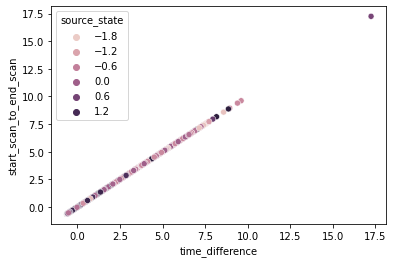

In [502]:
sns.scatterplot(data=std_data, x="time_difference", y="start_scan_to_end_scan", hue='source_state')

With visual analysis unable to see difference between time_difference and start_scan_to_end_scan.

Need to check using statistical methods


### Step 1: Define the null and alternate hypotheses

###### H_0: Calculated delivery time (time difference) is equal to start_scan_to_end_scan.
######  H_a: Calculated delivery time (time difference) is not equal to start_scan_to_end_scan
###### Let $\mu_1$ and $\mu_2$ be the mean calculated delivery time (time difference) and start_scan_to_end_scan respectively.
Mathematically, the above formulated hypotheses can be written as:
###### $H_0: \mu_1 = \mu_2$
###### $H_a: \mu_1 <> \mu_2$


### Step 2: Select Appropriate test

###### This is a two-tailed test concerning two population means from two independent populations. As the population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem.

### Step 3: Decide the significance level

###### As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [513]:
start_scan_to_end_scan = df['start_scan_to_end_scan']
time_difference = df['time_difference']
print('The sample standard deviation of the start scan to end scan time :', start_scan_to_end_scan.std)
print('The sample standard deviation of the calculated delivery time :', time_difference.std)

The sample standard deviation of the start scan to end scan time : <bound method NDFrame._add_numeric_operations.<locals>.std of 0        1260.0
1         999.0
2          58.0
3         122.0
4         834.0
          ...  
26363      62.0
26364      91.0
26365      44.0
26366     287.0
26367      66.0
Name: start_scan_to_end_scan, Length: 26368, dtype: float64>
The sample standard deviation of the calculated delivery time : <bound method NDFrame._add_numeric_operations.<locals>.std of 0        1260.604421
1         999.505379
2          58.832388
3         122.779486
4         834.638929
            ...     
26363      62.115193
26364      91.087797
26365      44.174403
26366     287.474007
26367      66.933565
Name: time_difference, Length: 26368, dtype: float64>


###### As the sample standard deviations closer to each other, the population standard deviations may be assumed to be closer.


### Step 5: Calculate the p-value

In [517]:
# import the required function
from scipy.stats import ttest_ind
# find the p-value
test_stat, p_value = ttest_ind(start_scan_to_end_scan, time_difference, equal_var = True, alternative = 'two-sided')
print('The p-value is', p_value)

# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we rejecting H-0')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we accepting H-0')

The p-value is 0.8965583786340379
As the p-value 0.8965583786340379 is greater than the level of significance, we accepting H-0


###### As the p-value 0.8965583786340379  is greater than the level of significance, we accepting the H-0

## Compare actual_time aggregated OSRM time aggregated value

<AxesSubplot:xlabel='actual_time', ylabel='osrm_time'>

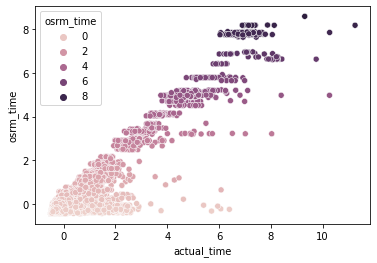

In [520]:
sns.scatterplot(data=std_data, x="actual_time", y="osrm_time", hue='osrm_time')

With visual analysis data scattered across there may be difference between actual time aggregaed and OSRM time aggregated

Need to check using statistical methods

### Step 1: Define the null and alternate hypotheses

###### H_0: actual_time aggregated is equal to OSRM time aggregated values.
######  H_a: actual_time aggregated is not equal to OSRM time aggregated values.
###### Let $\mu_1$ and $\mu_2$ be the mean actual_time aggregated and mean OSRM time aggregated values respectively.
#### Mathematically, the above formulated hypotheses can be written as:
###### $H_0: \mu_1 = \mu_2$
###### $H_a: \mu_1 <> \mu_2$


### Step 2: Select Appropriate test

###### This is a two-tailed test concerning two population means from two independent populations. As the population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem.

### Step 3: Decide the significance level

###### As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [521]:
actual_time = df['actual_time']
osrm_time = df['osrm_time']
print('The sample standard deviation of the actual_time aggregated value is :', actual_time.std)
print('The sample standard deviation of the osrm_time aggregated value is :', osrm_time.std)

The sample standard deviation of the actual_time aggregated value is : <bound method NDFrame._add_numeric_operations.<locals>.std of 0        732.0
1        830.0
2         47.0
3         96.0
4        611.0
         ...  
26363     51.0
26364     90.0
26365     30.0
26366    233.0
26367     42.0
Name: actual_time, Length: 26368, dtype: float64>
The sample standard deviation of the osrm_time aggregated value is : <bound method NDFrame._add_numeric_operations.<locals>.std of 0        349.0
1        394.0
2         26.0
3         42.0
4        212.0
         ...  
26363     41.0
26364     48.0
26365     14.0
26366     42.0
26367     26.0
Name: osrm_time, Length: 26368, dtype: float64>


###### As the sample standard deviations are different, the population standard deviations may be assumed to be different.

### Step 5: Calculate the p-value

In [524]:
# import the required function
from scipy.stats import ttest_ind
# find the p-value
test_stat, p_value = ttest_ind(actual_time, osrm_time, equal_var = True, alternative = 'two-sided')
print('The p-value is', p_value)

# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we rejecting H-0')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we accepting H-0')

The p-value is 0.0
As the p-value 0.0 is less than the level of significance, we rejecting H-0


###### As the p-value 0.0  is less than the level of significance, we rejecting the H-0

## Compare actual_time aggregated value and segment actual time aggregated value

<AxesSubplot:xlabel='actual_time', ylabel='segment_actual_time'>

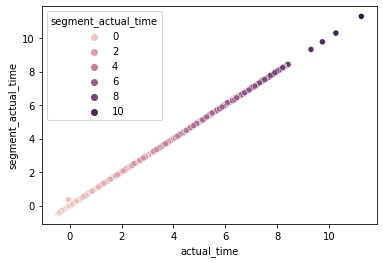

In [525]:
sns.scatterplot(data=std_data, x="actual_time", y="segment_actual_time", hue='segment_actual_time')

With visual analysis unable to see difference between actual_time and segment_actual_time.

Need to check using statistical methods

### Step 1: Define the null and alternate hypotheses

###### H_0: actual_time is equal to segment_actual_time.
######  H_a: actual_time is not equal to segment_actual_time.
###### Let $\mu_1$ and $\mu_2$ be the mean actual_time and segment_actual_time respectively.
Mathematically, the above formulated hypotheses can be written as:
###### $H_0: \mu_1 = \mu_2$
###### $H_a: \mu_1 <> \mu_2$


### Step 2: Select Appropriate test

###### This is a two-tailed test concerning two population means from two independent populations. As the population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem.

### Step 3: Decide the significance level

###### As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [526]:
actual_time = df['actual_time']
segment_actual_time = df['segment_actual_time']
print('The sample standard deviation of the actual_time :', actual_time.std)
print('The sample standard deviation of the segment_actual_time :', segment_actual_time.std)

The sample standard deviation of the actual_time : <bound method NDFrame._add_numeric_operations.<locals>.std of 0        732.0
1        830.0
2         47.0
3         96.0
4        611.0
         ...  
26363     51.0
26364     90.0
26365     30.0
26366    233.0
26367     42.0
Name: actual_time, Length: 26368, dtype: float64>
The sample standard deviation of the segment_actual_time : <bound method NDFrame._add_numeric_operations.<locals>.std of 0        728.0
1        820.0
2         46.0
3         95.0
4        608.0
         ...  
26363     49.0
26364     89.0
26365     29.0
26366    233.0
26367     41.0
Name: segment_actual_time, Length: 26368, dtype: float64>


###### As the sample standard deviations closer to each other, the population standard deviations may be assumed to be closer.


### Step 5: Calculate the p-value

In [527]:
# import the required function
from scipy.stats import ttest_ind
# find the p-value
test_stat, p_value = ttest_ind(actual_time, segment_actual_time, equal_var = True, alternative = 'two-sided')
print('The p-value is', p_value)

# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we rejecting H-0')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we accepting H-0')

The p-value is 0.5839328464797933
As the p-value 0.5839328464797933 is greater than the level of significance, we accepting H-0


###### As the p-value 0.5839328464797933  is greater than the level of significance, we accepting the H-0

## Compare osrm distance aggregated value and segment osrm distance aggregated value

<AxesSubplot:xlabel='osrm_distance', ylabel='segment_osrm_distance'>

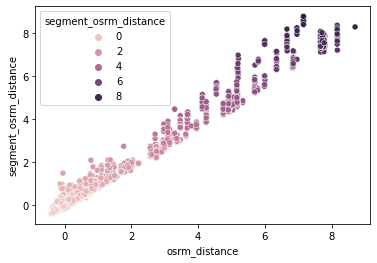

In [528]:
sns.scatterplot(data=std_data, x="osrm_distance", y="segment_osrm_distance", hue='segment_osrm_distance')


With visual analysis data scattered across there may be difference between osrm distance aggregated value and segment osrm distance aggregated value
Need to check using statistical methods

### Step 1: Define the null and alternate hypotheses

###### H_0: osrm distance aggregated value is equal to segment osrm distance aggregated values.
######  H_a: osrm distance aggregated value is not equal to segment osrm distance aggregated values.
###### Let $\mu_1$ and $\mu_2$ be the mean osrm distance aggregated value and mean segment osrm distance aggregated value respectively.
#### Mathematically, the above formulated hypotheses can be written as:
###### $H_0: \mu_1 = \mu_2$
###### $H_a: \mu_1 <> \mu_2$


### Step 2: Select Appropriate test

###### This is a two-tailed test concerning two population means from two independent populations. As the population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem.

### Step 3: Decide the significance level

###### As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [533]:
osrm_distance = df['osrm_distance']
segment_osrm_distance = df['segment_osrm_distance']
print('The sample standard deviation of the osrm_distance aggregated value is :', osrm_distance.std)
print('The sample standard deviation of the segment_osrm_distance aggregated value is :', segment_osrm_distance.std)

The sample standard deviation of the osrm_distance aggregated value is : <bound method NDFrame._add_numeric_operations.<locals>.std of 0        446.5496
1        544.8027
2         28.1994
3         56.9116
4        281.2109
           ...   
26363     42.5213
26364     40.6080
26365     16.0185
26366     52.5303
26367     28.0484
Name: osrm_distance, Length: 26368, dtype: float64>
The sample standard deviation of the segment_osrm_distance aggregated value is : <bound method NDFrame._add_numeric_operations.<locals>.std of 0        670.6205
1        649.8528
2         28.1995
3         55.9899
4        317.7408
           ...   
26363     42.1431
26364     78.5869
26365     16.0184
26366     52.5303
26367     28.0484
Name: segment_osrm_distance, Length: 26368, dtype: float64>


###### As the sample standard deviations are different, the population standard deviations may be assumed to be different.

### Step 5: Calculate the p-value

In [530]:
# import the required function
from scipy.stats import ttest_ind
# find the p-value
test_stat, p_value = ttest_ind(osrm_distance, segment_osrm_distance, equal_var = True, alternative = 'two-sided')
print('The p-value is', p_value)

# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we rejecting H-0')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we accepting H-0')

The p-value is 1.57892754563369e-05
As the p-value 1.57892754563369e-05 is less than the level of significance, we rejecting H-0


###### As the p-value 1.57892754563369e-05  is less than the level of significance, we rejecting the H-0

## Compare osrm time aggregated value and segment osrm time aggregated value

<AxesSubplot:xlabel='osrm_time', ylabel='segment_osrm_time'>

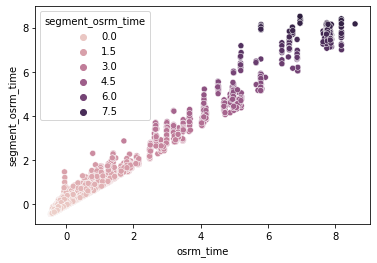

In [532]:
sns.scatterplot(data=std_data, x="osrm_time", y="segment_osrm_time", hue='segment_osrm_time')


With visual analysis data scattered across there may be difference between osrm distance aggregated value and segment osrm distance aggregated value
Need to check using statistical methods

### Step 1: Define the null and alternate hypotheses

###### H_0: osrm_time aggregated value is equal to segment_osrm_time aggregated values.
######  H_a: osrm_time aggregated value is not equal to segment_osrm_time aggregated values.
###### Let $\mu_1$ and $\mu_2$ be the mean osrm_time aggregated value and mean segment osrm_time aggregated value respectively.
#### Mathematically, the above formulated hypotheses can be written as:
###### $H_0: \mu_1 = \mu_2$
###### $H_a: \mu_1 <> \mu_2$


### Step 2: Select Appropriate test

###### This is a two-tailed test concerning two population means from two independent populations. As the population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem.

### Step 3: Decide the significance level

###### As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [535]:
osrm_time = df['osrm_time']
segment_osrm_time = df['segment_osrm_time']
print('The sample standard deviation of the osrm_time aggregated value is :', osrm_time.std)
print('The sample standard deviation of the segment_osrm_time aggregated value is :', segment_osrm_time.std)

The sample standard deviation of the osrm_time aggregated value is : <bound method NDFrame._add_numeric_operations.<locals>.std of 0        349.0
1        394.0
2         26.0
3         42.0
4        212.0
         ...  
26363     41.0
26364     48.0
26365     14.0
26366     42.0
26367     26.0
Name: osrm_time, Length: 26368, dtype: float64>
The sample standard deviation of the segment_osrm_time aggregated value is : <bound method NDFrame._add_numeric_operations.<locals>.std of 0        534.0
1        474.0
2         26.0
3         39.0
4        231.0
         ...  
26363     42.0
26364     77.0
26365     14.0
26366     42.0
26367     25.0
Name: segment_osrm_time, Length: 26368, dtype: float64>


###### As the sample standard deviations are different, the population standard deviations may be assumed to be different.

### Step 5: Calculate the p-value

In [536]:
# import the required function
from scipy.stats import ttest_ind
# find the p-value
test_stat, p_value = ttest_ind(osrm_time, segment_osrm_time, equal_var = True, alternative = 'two-sided')
print('The p-value is', p_value)

# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we rejecting H-0')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we accepting H-0')

The p-value is 1.441878590900604e-09
As the p-value 1.441878590900604e-09 is less than the level of significance, we rejecting H-0


###### As the p-value 1.441878590900604e-09  is less than the level of significance, we rejecting the H-0

## Outlier detection

(array([0, 1]),
 [Text(0, 0, '-1.059004279293066'), Text(1, 0, '0.9442832475309217')])

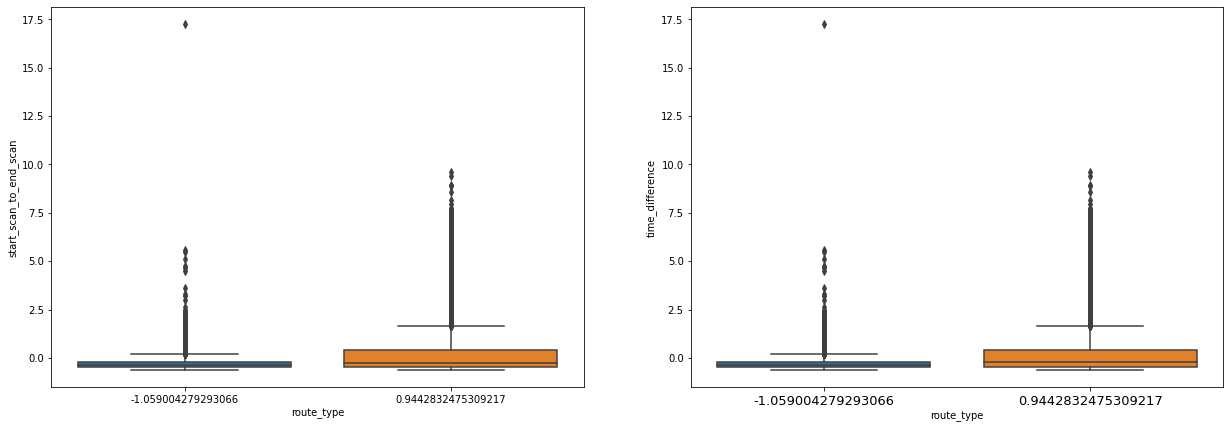

In [538]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(21,7))
sns.boxplot(x = 'route_type', y = 'start_scan_to_end_scan', data=std_data, ax=ax1)
sns.boxplot(x = 'route_type', y = 'time_difference', data=std_data, ax=ax2)
# sns.boxplot(x = 'type', y = 'Season', data=netflix_df, ax=ax3)
plt.xticks(fontsize= 13)
# plt.title('Box plot of numerical columns', fontsize=16);

(array([0, 1]),
 [Text(0, 0, '-1.059004279293066'), Text(1, 0, '0.9442832475309217')])

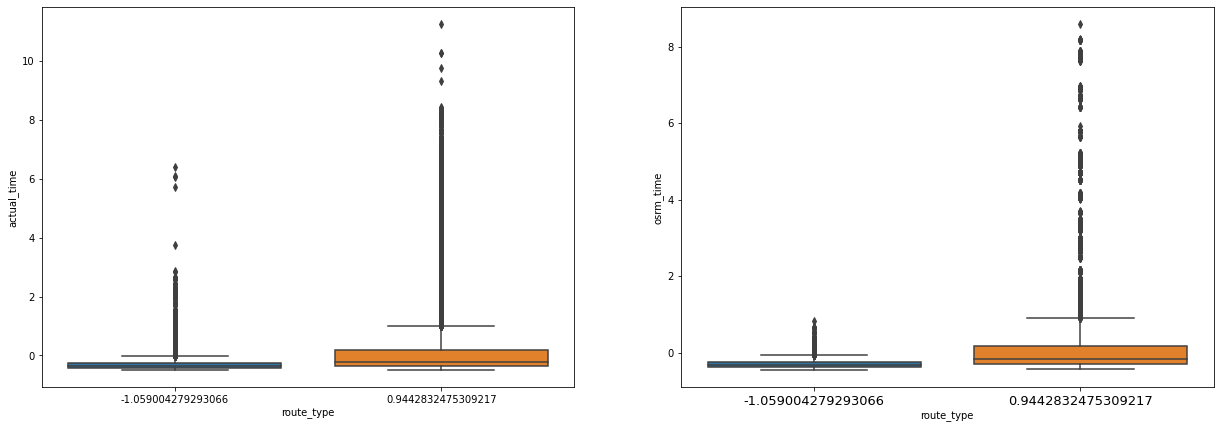

In [539]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(21,7))
sns.boxplot(x = 'route_type', y = 'actual_time', data=std_data, ax=ax1)
sns.boxplot(x = 'route_type', y = 'osrm_time', data=std_data, ax=ax2)
# sns.boxplot(x = 'type', y = 'Season', data=netflix_df, ax=ax3)
plt.xticks(fontsize= 13)
# plt.title('Box plot of numerical columns', fontsize=16);

(array([0, 1]),
 [Text(0, 0, '-1.059004279293066'), Text(1, 0, '0.9442832475309217')])

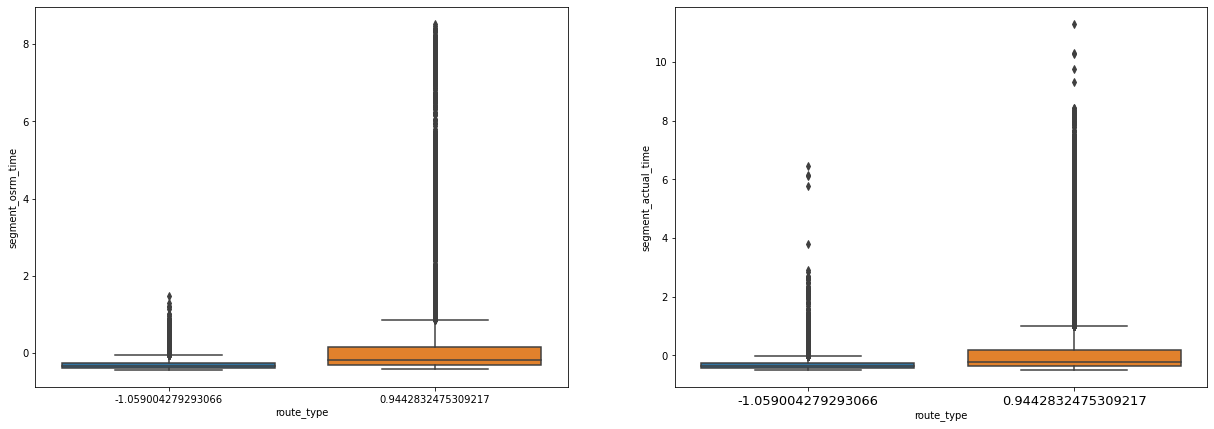

In [540]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(21,7))
sns.boxplot(x = 'route_type', y = 'segment_osrm_time', data=std_data, ax=ax1)
sns.boxplot(x = 'route_type', y = 'segment_actual_time', data=std_data, ax=ax2)
# sns.boxplot(x = 'type', y = 'Season', data=netflix_df, ax=ax3)
plt.xticks(fontsize= 13)
# plt.title('Box plot of numerical columns', fontsize=16);

## Recommendation

#### From the above analysis, 
##### there is difference between actual time & OSRM time (OSRM time is less than the actual time)  
##### Delhivery can try to use the OSRM path it may lead to better result in delivery